In [23]:
import pvdeg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
weather, meta = pvdeg.weather.get(
    database="PVGIS", id=(40.633365593159226, -73.9945801019899)
)

In [3]:
pvdeg.standards.pysam(
    weather_df=weather,
    meta=meta,
    model="pvwatts8",
    model_default="PVWattsCommercial",
    results=["annual_energy"],
)

{'annual_energy': 741255.4755578301}

In [4]:
out_dict = pvdeg.standards.pysam(
    weather_df=weather,
    meta=meta,
    model="pysamv1",
    model_default="FlatPlatePVCommercial",
)
out_dict.keys()

dict_keys(['ac_gross', 'ac_lifetime_loss', 'ac_perf_adj_loss', 'ac_transmission_loss', 'ac_wiring_loss', 'airmass', 'alb', 'annual_ac_gross', 'annual_ac_inv_clip_loss_percent', 'annual_ac_inv_eff_loss_percent', 'annual_ac_inv_pnt_loss_percent', 'annual_ac_inv_pso_loss_percent', 'annual_ac_lifetime_loss_percent', 'annual_ac_loss_ond', 'annual_ac_perf_adj_loss_percent', 'annual_ac_wiring_loss', 'annual_ac_wiring_loss_percent', 'annual_bifacial_electrical_mismatch', 'annual_bifacial_electrical_mismatch_percent', 'annual_dc_diodes_loss', 'annual_dc_diodes_loss_percent', 'annual_dc_gross', 'annual_dc_inv_tdc_loss_percent', 'annual_dc_invmppt_loss', 'annual_dc_lifetime_loss_percent', 'annual_dc_loss_ond', 'annual_dc_mismatch_loss', 'annual_dc_mismatch_loss_percent', 'annual_dc_module_loss_percent', 'annual_dc_mppt_clip_loss_percent', 'annual_dc_nameplate_loss', 'annual_dc_nameplate_loss_percent', 'annual_dc_net', 'annual_dc_nominal', 'annual_dc_optimizer_loss', 'annual_dc_optimizer_loss_perc

In [6]:
for key, item in out_dict.items():
    if isinstance(item, tuple):
        print(key)

ac_gross
ac_lifetime_loss
ac_perf_adj_loss
ac_transmission_loss
ac_wiring_loss
airmass
alb
annual_energy_distribution_time
bifacial_electrical_mismatch
dc_degrade_factor
dc_invmppt_loss
dc_lifetime_loss
dc_net
dc_snow_loss
df
dn
gen
gh
gh_calc
ground_absorbed
ground_incident
inv_cliploss
inv_eff
inv_pntloss
inv_psoloss
inv_tdcloss
inv_total_loss
inverterMPPT1_DCVoltage
monthly_dc
monthly_energy
monthly_poa_beam_eff
monthly_poa_beam_nom
monthly_poa_eff
monthly_poa_front
monthly_poa_nom
monthly_poa_rear
poa_beam_eff
poa_beam_nom
poa_eff
poa_front
poa_nom
poa_rear
poa_rear_direct_diffuse
poa_rear_ground_reflected
poa_rear_rack_shaded
poa_rear_row_reflections
poa_rear_self_shaded
poa_rear_soiled
poa_shaded
poa_shaded_soiled
shadedb_subarray1_shade_frac
snowdepth
sol_alt
sol_azi
sol_zen
subarray1_aoi
subarray1_aoi_modifier
subarray1_axisrot
subarray1_beam_shading_factor
subarray1_celltemp
subarray1_celltempSS
subarray1_dc_gross
subarray1_dc_voltage
subarray1_ground_rear_spatial
subarray1_id

subarray1_poa_ground_front_cs  
subarray1_ground_rear_spatial

In [29]:
x = out_dict["subarray1_ground_rear_spatial"][
    0
]  # these are the distances where the calculations are done

data = out_dict["subarray1_ground_rear_spatial"][1:]
row = data[15]

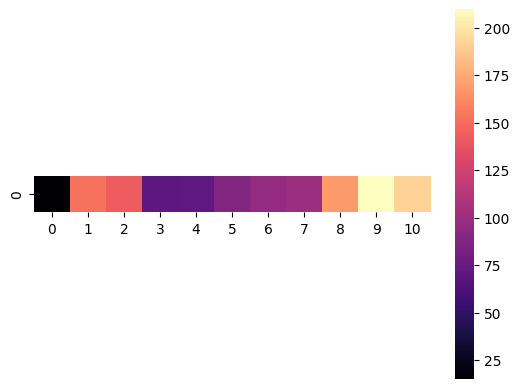

In [28]:
row_arr = np.array(row)
plot = sns.heatmap([row_arr], square=True, cmap="magma")

plt.show()